<h1 style="font-size:3rem;color:#A3623B;">Lab 5: Support Vector Machines</h1>

## Security and Ethical aspects of data
### Amaya Nogales Gómez


<h2> Part 3: Performance evaluation.</h2>

In [1]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn.svm import SVC
from sklearn import datasets #For real datasets
from sklearn import metrics
import math
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [2]:
def generate_synthetic_data(n_samples):
    """
        Code for generating the synthetic data.
        We will have two non-sensitive features and one sensitive feature.
        A sensitive feature value of 0.0 means the example is considered to be in protected group (e.g., female) and 1.0 means it's in non-protected group (e.g., male).
    """

    # n_samples = 100 # generate these many data points per class

    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean=mean_in, cov=cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv, X, y

    """ Generate the features randomly """
    # For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2, -2], [[10, 1], [1, 3]]
    nv1, X1, y1 = gen_gaussian(
        int(n_samples), mu1, sigma1, 1)  # positive class
    nv2, X2, y2 = gen_gaussian(
        int(n_samples), mu2, sigma2, 0)  # negative class

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))

    # shuffle the data
    perm = list(range(0, n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]

    return X, y


In [3]:
n_size=50
X_syn, y_syn = generate_synthetic_data(n_size) 

In [4]:
#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]



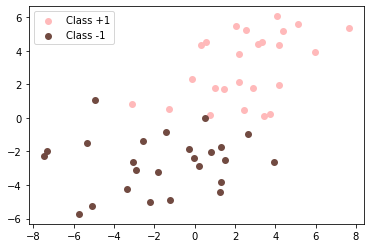

In [5]:
plt.scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

Now we calculate the SVM classifier for 3 different values of $C$:


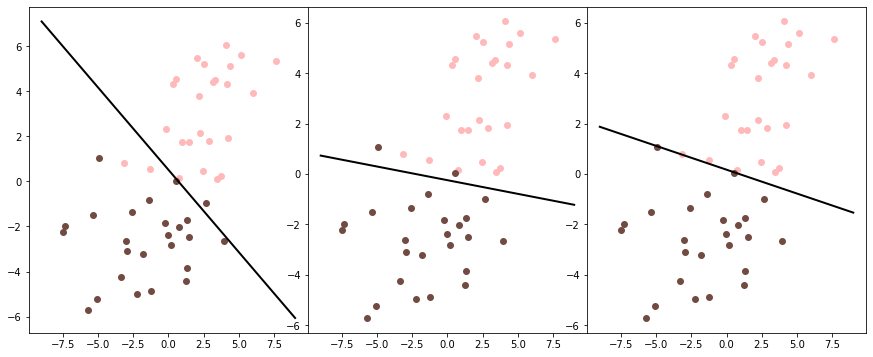

In [6]:
# SVM Classifier model
# the hyperparameter C control the margin violations
# smaller C leads to more margin violations but wider margin
fig, axs = plt.subplots(1, 3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.5, wspace=.001)

axs = axs.ravel()
C_i = [0.00001, 1, 100000]
C_range = np.shape(C_i)[0]
Accuracy_training = np.empty([C_range])
Accuracy_testing = np.empty([C_range])
Accuracy_validation = np.empty([C_range])
for i in range(C_range):

    # axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    # axs[i].set_title(str(250+i))

    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    axs[i].scatter(X_syn_training[y_syn_training == 1][:, 0], X_syn_training[y_syn_training == 1]
                   [:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label="Class +1")
    axs[i].scatter(X_syn_training[y_syn_training == 0][:, 0], X_syn_training[y_syn_training == 0]
                   [:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label="Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)

    y_pred_training = svm_clf.predict(X_syn_training)
    y_pred_testing = svm_clf.predict(X_syn_testing)
    y_pred_validation = svm_clf.predict(X_syn_validation)

    Accuracy_training[i] = (metrics.accuracy_score(
        y_syn_training, y_pred_training)*100)
    Accuracy_testing[i] = (metrics.accuracy_score(
        y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i] = (metrics.accuracy_score(
        y_syn_validation, y_pred_validation)*100)

plt.show()


In [7]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

		     C_1 C_2 C_3
Accuracy training   [ 94.  96. 100.]
Accuracy testing    [ 80. 100. 100.]
Accuracy validation [88. 88. 88.]


For reporting the final accuracy in this dataset, we need to:

1-Train the SVM for all datasets k (in our case k=1) and all the Cs.

2-Choose $C^*$ as the one giving the maximum accuracy in the testing set.

3-Report the accuracy in the validation set.


In [9]:
max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]
print(f"The accuracy in the studied dataset is {Final_accuracy}")

The accuracy in the studied dataset is 88.0


## Question:

**23-** Repeat the same for n_samples=100. Do the same k-fold cross-validation for $k=1$ and provide the final accuracy. 

In [10]:
n_size = 100
X_syn, y_syn = generate_synthetic_data(n_size)


In [11]:
#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]



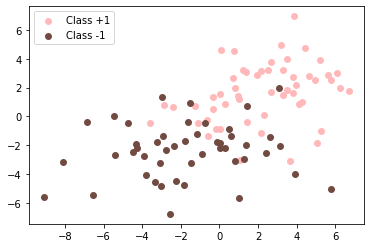

In [12]:
plt.scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

Now we calculate the SVM classifier for 3 different values of $C$:


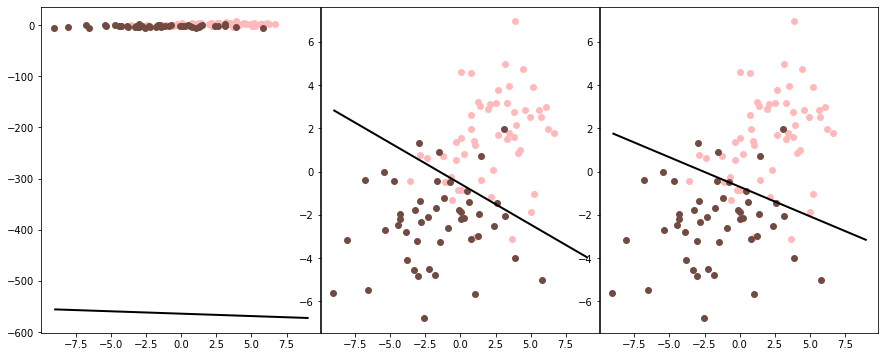

In [13]:
# SVM Classifier model
# the hyperparameter C control the margin violations
# smaller C leads to more margin violations but wider margin
fig, axs = plt.subplots(1, 3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.5, wspace=.001)

axs = axs.ravel()
C_i = [0.00001, 1, 100000]
C_range = np.shape(C_i)[0]
Accuracy_training = np.empty([C_range])
Accuracy_testing = np.empty([C_range])
Accuracy_validation = np.empty([C_range])
for i in range(C_range):

    # axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    # axs[i].set_title(str(250+i))

    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    axs[i].scatter(X_syn_training[y_syn_training == 1][:, 0], X_syn_training[y_syn_training == 1]
                   [:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label="Class +1")
    axs[i].scatter(X_syn_training[y_syn_training == 0][:, 0], X_syn_training[y_syn_training == 0]
                   [:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label="Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)

    y_pred_training = svm_clf.predict(X_syn_training)
    y_pred_testing = svm_clf.predict(X_syn_testing)
    y_pred_validation = svm_clf.predict(X_syn_validation)

    Accuracy_training[i] = (metrics.accuracy_score(
        y_syn_training, y_pred_training)*100)
    Accuracy_testing[i] = (metrics.accuracy_score(
        y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i] = (metrics.accuracy_score(
        y_syn_validation, y_pred_validation)*100)

plt.show()


In [14]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

		     C_1 C_2 C_3
Accuracy training   [53. 88. 88.]
Accuracy testing    [46. 82. 82.]
Accuracy validation [48. 80. 80.]


In [15]:
max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]
print(f"The accuracy in the studied dataset is {Final_accuracy}")

The accuracy in the studied dataset is 80.0


**24-** What happens with the first classifier?

The value of $C$ is too small, therefore the classifier fails.

**25-** Change the range of parameters values for $C$ and repeat 23. For example: $C_i[0]=0.001$.


In [16]:
n_size = 100
X_syn, y_syn = generate_synthetic_data(n_size)


In [17]:
#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]



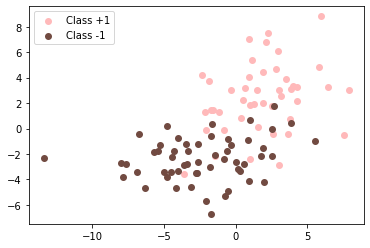

In [18]:
plt.scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

Now we calculate the SVM classifier for 3 different values of $C$:


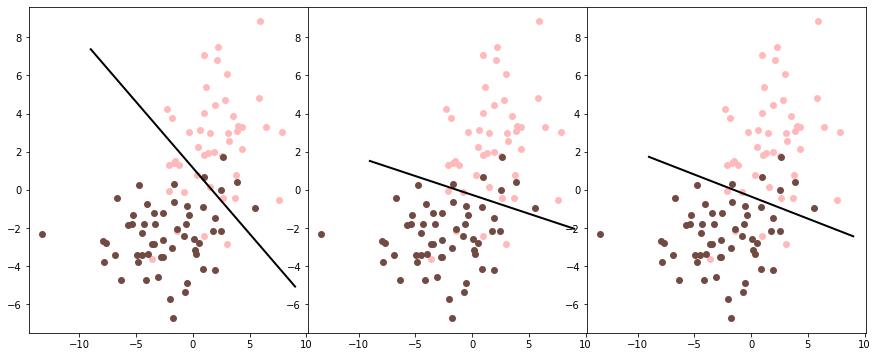

In [19]:
# SVM Classifier model
# the hyperparameter C control the margin violations
# smaller C leads to more margin violations but wider margin
fig, axs = plt.subplots(1, 3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.5, wspace=.001)

axs = axs.ravel()
C_i = [0.001, 1, 100000]
C_range = np.shape(C_i)[0]
Accuracy_training = np.empty([C_range])
Accuracy_testing = np.empty([C_range])
Accuracy_validation = np.empty([C_range])
for i in range(C_range):

    # axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    # axs[i].set_title(str(250+i))

    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    axs[i].scatter(X_syn_training[y_syn_training == 1][:, 0], X_syn_training[y_syn_training == 1]
                   [:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label="Class +1")
    axs[i].scatter(X_syn_training[y_syn_training == 0][:, 0], X_syn_training[y_syn_training == 0]
                   [:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label="Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)

    y_pred_training = svm_clf.predict(X_syn_training)
    y_pred_testing = svm_clf.predict(X_syn_testing)
    y_pred_validation = svm_clf.predict(X_syn_validation)

    Accuracy_training[i] = (metrics.accuracy_score(
        y_syn_training, y_pred_training)*100)
    Accuracy_testing[i] = (metrics.accuracy_score(
        y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i] = (metrics.accuracy_score(
        y_syn_validation, y_pred_validation)*100)

plt.show()


In [20]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

		     C_1 C_2 C_3
Accuracy training   [84. 88. 89.]
Accuracy testing    [84. 90. 94.]
Accuracy validation [88. 90. 90.]


In [21]:
max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]
print(f"The accuracy in the studied dataset is {Final_accuracy}")

The accuracy in the studied dataset is 90.0


If we repeat again the same calculations shuffling the data, we will do a 2-fold cross-validation.

Then, for the reporting of results, we will provide the mean (and median and variance) of accuracies among the folds (instances).

In [23]:
# Instance 1:

n_size = 100
X_syn, y_syn = generate_synthetic_data(n_size)

# Generate training, testing and validation:
n = np.shape(X_syn)[0]
n_train = int(0.5*n)

X_syn_training = X_syn[0:n_train, :]
y_syn_training = y_syn[0:n_train]

X_syn_testing = X_syn[n_train:(n_train+math.floor((n-n_train)/2)), :]
y_syn_testing = y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation = X_syn[(n_train+math.floor((n-n_train)/2)):n, :]
y_syn_validation = y_syn[(n_train+math.floor((n-n_train)/2)):n]

C_i = [0.001, 1, 100000]
C_range = np.shape(C_i)[0]
Accuracy_training = np.empty([C_range])
Accuracy_testing = np.empty([C_range])
Accuracy_validation = np.empty([C_range])
for i in range(C_range):

    # axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    # axs[i].set_title(str(250+i))

    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    y_pred_training = svm_clf.predict(X_syn_training)
    y_pred_testing = svm_clf.predict(X_syn_testing)
    y_pred_validation = svm_clf.predict(X_syn_validation)

    Accuracy_training[i] = (metrics.accuracy_score(
        y_syn_training, y_pred_training)*100)
    Accuracy_testing[i] = (metrics.accuracy_score(
        y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i] = (metrics.accuracy_score(
        y_syn_validation, y_pred_validation)*100)


print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ", Accuracy_training)
print("Accuracy testing   ", Accuracy_testing)
print("Accuracy validation", Accuracy_validation)

max_t = max(Accuracy_testing)
i_loc = np.where(Accuracy_testing >= max_t)
i_loc = i_loc[0][0]

Final_accuracy = Accuracy_validation[i_loc]


# Instance 2:
# We shuffle the data, we do NOT generate new data:
perm = list(range(0, n_size*2))
shuffle(perm)
X_syn = X_syn[perm]
y_syn = y_syn[perm]

# Generate training, testing and validation:
n = np.shape(X_syn)[0]
n_train = int(0.5*n)

X_syn_training = X_syn[0:n_train, :]
y_syn_training = y_syn[0:n_train]

X_syn_testing = X_syn[n_train:(n_train+math.floor((n-n_train)/2)), :]
y_syn_testing = y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation = X_syn[(n_train+math.floor((n-n_train)/2)):n, :]
y_syn_validation = y_syn[(n_train+math.floor((n-n_train)/2)):n]


		     C_1 C_2 C_3
Accuracy training   [85. 86. 86.]
Accuracy testing    [92. 88. 88.]
Accuracy validation [86. 94. 94.]


In [24]:
# And we solve the correspondins SVMS

# SVM Classifier model
# the hyperparameter C control the margin violations
# smaller C leads to more margin violations but wider margin

Accuracy_training = np.empty([C_range])
Accuracy_testing = np.empty([C_range])
Accuracy_validation = np.empty([C_range])
for i in range(C_range):

    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    y_pred_training = svm_clf.predict(X_syn_training)
    y_pred_testing = svm_clf.predict(X_syn_testing)
    y_pred_validation = svm_clf.predict(X_syn_validation)

    Accuracy_training[i] = (metrics.accuracy_score(
        y_syn_training, y_pred_training)*100)
    Accuracy_testing[i] = (metrics.accuracy_score(
        y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i] = (metrics.accuracy_score(
        y_syn_validation, y_pred_validation)*100)


In [25]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy2=Accuracy_validation[i_loc]
print("The accuracy in the first instance is %.2f" %Final_accuracy)
print("The accuracy in the second instance is %.2f" %Final_accuracy2)
sol_acc=(Final_accuracy+Final_accuracy2)/2
print("The accuracy in the studied dataset is %.2f" %sol_acc)

		     C_1 C_2 C_3
Accuracy training   [87. 88. 88.]
Accuracy testing    [90. 90. 90.]
Accuracy validation [82. 86. 84.]
The accuracy in the first instance is 86.00
The accuracy in the second instance is 82.00
The accuracy in the studied dataset is 84.00


## Questions:

**26-** Repeat the same k-fold cross-validation but changing the size of the training, testing and validation dataset.

Now we have:<br />
training 50%<br />
testing 25%<br />
validation 25%<br />

Change it as the following:<br />

training 40%<br />
testing 30%<br />
validation 30%<br />


In [29]:
# Instance 1:

n_size = 100
X_syn, y_syn = generate_synthetic_data(n_size)

# Generate training, testing and validation:
n = np.shape(X_syn)[0]
n_train = int(0.4*n)

X_syn_training = X_syn[0:n_train, :]
y_syn_training = y_syn[0:n_train]

X_syn_testing = X_syn[n_train:(n_train+math.floor((n-n_train)/2)), :]
y_syn_testing = y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation = X_syn[(n_train+math.floor((n-n_train)/2)):n, :]
y_syn_validation = y_syn[(n_train+math.floor((n-n_train)/2)):n]

C_i = [0.001, 1, 100000]
C_range = np.shape(C_i)[0]
Accuracy_training = np.empty([C_range])
Accuracy_testing = np.empty([C_range])
Accuracy_validation = np.empty([C_range])
for i in range(C_range):

    # axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    # axs[i].set_title(str(250+i))

    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    y_pred_training = svm_clf.predict(X_syn_training)
    y_pred_testing = svm_clf.predict(X_syn_testing)
    y_pred_validation = svm_clf.predict(X_syn_validation)

    Accuracy_training[i] = (metrics.accuracy_score(
        y_syn_training, y_pred_training)*100)
    Accuracy_testing[i] = (metrics.accuracy_score(
        y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i] = (metrics.accuracy_score(
        y_syn_validation, y_pred_validation)*100)


print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ", Accuracy_training)
print("Accuracy testing   ", Accuracy_testing)
print("Accuracy validation", Accuracy_validation)

max_t = max(Accuracy_testing)
i_loc = np.where(Accuracy_testing >= max_t)
i_loc = i_loc[0][0]

Final_accuracy = Accuracy_validation[i_loc]


# Instance 2:
# We shuffle the data, we do NOT generate new data:
perm = list(range(0, n_size*2))
shuffle(perm)
X_syn = X_syn[perm]
y_syn = y_syn[perm]

# Generate training, testing and validation:
n = np.shape(X_syn)[0]
n_train = int(0.5*n)

X_syn_training = X_syn[0:n_train, :]
y_syn_training = y_syn[0:n_train]

X_syn_testing = X_syn[n_train:(n_train+math.floor((n-n_train)/2)), :]
y_syn_testing = y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation = X_syn[(n_train+math.floor((n-n_train)/2)):n, :]
y_syn_validation = y_syn[(n_train+math.floor((n-n_train)/2)):n]


		     C_1 C_2 C_3
Accuracy training   [81.25 87.5  86.25]
Accuracy testing    [73.33333333 85.         85.        ]
Accuracy validation [85.         88.33333333 86.66666667]


In [30]:
# And we solve the correspondins SVMS

# SVM Classifier model
# the hyperparameter C control the margin violations
# smaller C leads to more margin violations but wider margin

Accuracy_training = np.empty([C_range])
Accuracy_testing = np.empty([C_range])
Accuracy_validation = np.empty([C_range])
for i in range(C_range):

    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    y_pred_training = svm_clf.predict(X_syn_training)
    y_pred_testing = svm_clf.predict(X_syn_testing)
    y_pred_validation = svm_clf.predict(X_syn_validation)

    Accuracy_training[i] = (metrics.accuracy_score(
        y_syn_training, y_pred_training)*100)
    Accuracy_testing[i] = (metrics.accuracy_score(
        y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i] = (metrics.accuracy_score(
        y_syn_validation, y_pred_validation)*100)


In [31]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy2=Accuracy_validation[i_loc]
print("The accuracy in the first instance is %.2f" %Final_accuracy)
print("The accuracy in the second instance is %.2f" %Final_accuracy2)
sol_acc=(Final_accuracy+Final_accuracy2)/2
print("The accuracy in the studied dataset is %.2f" %sol_acc)

		     C_1 C_2 C_3
Accuracy training   [84. 91. 90.]
Accuracy testing    [88. 86. 86.]
Accuracy validation [82. 80. 80.]
The accuracy in the first instance is 88.33
The accuracy in the second instance is 82.00
The accuracy in the studied dataset is 85.17


**27-** Do you obtain a better solution?

Yes, we previously had 84% accuracy and now have 85.17%.